In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

<Axes: >

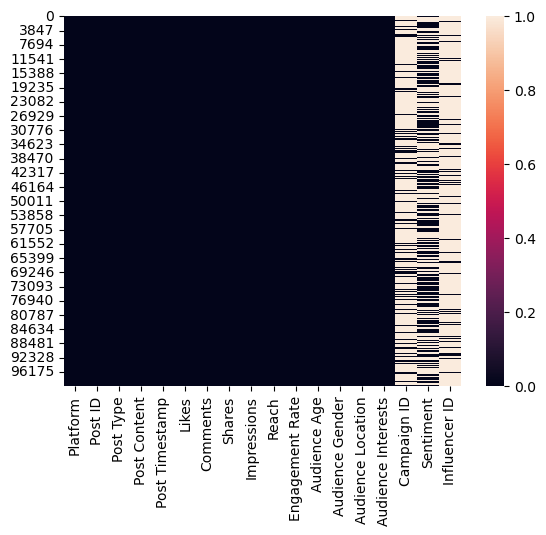

In [2]:
df=pd.read_excel('/home/resumetozero/Downloads/social_media_engagement_data.xlsx',sheet_name='social_media_engagement_data')
sns.heatmap(df.isnull())

In [3]:
df=df.drop(columns=['Campaign ID','Sentiment','Influencer ID'])
df=df.loc[df['Reach']>= (df['Likes']+df['Comments']+df['Shares'])]

Home_Reach : generating random value between 0 to (reach-like-shares-comments)

In [7]:
df['Home_Reach']=df['Reach'] -( df['Likes'] + df['Shares'] + df['Comments'])
df['Home_Reach'] = df['Home_Reach'].apply(
    lambda x: np.random.randint(0, x + 1) if x > 0 else 0
)

Explore_Reach : generating random value between 0 to (reach-like-shares-comments-home_reach)


In [8]:
df['Explore_Reach']=df['Reach'] -( df['Likes'] + df['Shares'] + df['Comments'] + df['Home_Reach'])
df['Explore_Reach'] = df['Explore_Reach'].apply(
    lambda x: np.random.randint(0, x + 1) if x > 0 else 0
)

Hashtag_Reach : generating random value between 0 to (reach-like-shares-comments-home_reach-explore_reach)

In [9]:
df['Hashtag_Reach']=df['Reach'] -( df['Likes'] + df['Shares'] + df['Comments'] + df['Home_Reach'] + df['Explore_Reach'])
df['Hashtag_Reach'] = df['Hashtag_Reach'].apply(
    lambda x: np.random.randint(0, x + 1) if x > 0 else 0
)

Username : generating random username by choosing random values from name and nums

In [10]:
def generate_username():
    names=['anuj','abhi','kolla','surru','huggies','pokemon','don_hu_me','chappri_no_','anyway','gunjkal',"John", "Jane", "David", "Sarah", "Michael", "Emily", "Daniel", "Emma", "Christopher", "Olivia",'alexendra','pogos','silver_saint']
    nums=[4326,342,669,34,79,6,5,4,3586,634,3568,634,79,2645,3463346,6586,2002,1999,1989,
     6666,1111,2222,3333,4444,555,6666,777,888,999]
    return f"{np.random.choice(names)}_{np.random.choice(nums)}"
username=[generate_username() for _ in range(100)]

df['Username'] = [np.random.choice(username) for _ in range(len(df))]

In [11]:
len(df['Username'].unique())

89

Sentimental : (like+comment+share+home_reach+Explore_reach+hashtag_reach)/reach

In [20]:
group_user =df.groupby('Username').apply(
    lambda group: (group['Likes'] + group['Comments'] + group['Shares']+group['Home_Reach']+group['Explore_Reach']+group['Hashtag_Reach']).sum() / group['Impressions'].sum()
)
df['Avg_engagement_user'] = df['Username'].map(group_user)

df['Sentiment'] = df.apply(
    lambda row: 'YES' if (row['Likes'] + row['Comments'] + row['Shares'] + row['Home_Reach'] + row['Explore_Reach'] + row['Hashtag_Reach'])/row['Impressions'] > group_user[row['Username']] else 'NO',
    axis=1
)
# df

/tmp/ipykernel_12329/338670010.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_user =df.groupby('Username').apply(


In [21]:
# fdata=fdata.to_csv('facebook_data.csv',index=False)
# idata=idata.to_csv('instagram_data.csv',index=False)
# tdata=tdata.to_csv('twitter_data.csv',index=False)
# ldata=ldata.to_csv('linkedin_data.csv',index=False)

r=df.to_csv('Social_media_refined_data.csv',index=False)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91749 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Platform             91749 non-null  object        
 1   Post ID              91749 non-null  object        
 2   Post Type            91749 non-null  object        
 3   Post Content         91749 non-null  object        
 4   Post Timestamp       91749 non-null  datetime64[ns]
 5   Likes                91749 non-null  int64         
 6   Comments             91749 non-null  int64         
 7   Shares               91749 non-null  int64         
 8   Impressions          91749 non-null  int64         
 9   Reach                91749 non-null  int64         
 10  Engagement Rate      91749 non-null  float64       
 11  Audience Age         91749 non-null  int64         
 12  Audience Gender      91749 non-null  object        
 13  Audience Location    91749 non-null 

splitting data into categories

In [26]:
df['Platform'].unique()

array(['LinkedIn', 'Instagram', 'Twitter', 'Facebook'], dtype=object)

In [29]:
fdata=df[df['Platform']=='Facebook'].Sample(1000)

idata=df[df['Platform']=='Instagram'].Sample(1000)

tdata=df[df['Platform']=='Twitter'].Sample(1000)

ldata=df[df['Platform']=='LinkedIn'].Sample(1000)

concatinated all four data frame into result

In [31]:
result = pd.concat([fdata,idata,tdata,ldata], ignore_index=True) 
r2=result.to_csv('Social_media_refined_data_4000.csv',index=False)

In [ ]:
# d=fdata.loc[fdata['Post ID']=='854dcd1e-e09c-4683-ba10-bd231140fff9']
# d